In [1]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# -----------------------------
# 1. Data Preprocessing (Single Action Class)
# -----------------------------
base_dir = "/kaggle/input/ju-cricket/Cricket_Dataset_final/Task_B"  # base Task_B folder

action_class = "Umpire"  # Change to "Bowling" / "Fielding" / "Umpire"

transform = transforms.Compose([
    transforms.Resize((224, 224)),   
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# Point ImageFolder to *only* the action class folder
train_ds = datasets.ImageFolder(f"{base_dir}/train/{action_class}", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/{action_class}", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/{action_class}", transform=transform)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

print(f"Training only on: {action_class}")
print("Train classes:", train_ds.classes)
print("Train samples:", len(train_ds), 
      "Val samples:", len(val_ds), 
      "Test samples:", len(test_ds))

Training only on: Umpire
Train classes: ['Four', 'Leg_Bye', 'No_ball', 'Out', 'Six', 'Wide']
Train samples: 1728 Val samples: 468 Test samples: 585


In [2]:
print("Total training images:", len(train_ds))
print("Total validation images:", len(val_ds))
print("Total test images:", len(test_ds))

total_images = len(train_ds) + len(val_ds) + len(test_ds)
print("Total images in dataset:", total_images)

Total training images: 1728
Total validation images: 468
Total test images: 585
Total images in dataset: 2781


In [3]:
ignore_folder = "random_occlusion"

def count_images_ignore_folder(dataset, ignore_folder):
    count = 0
    for img_path, label in dataset.samples:
        # Skip if the image path contains the ignore_folder
        if ignore_folder not in img_path.split("/"):
            count += 1
    return count

train_count = count_images_ignore_folder(train_ds, ignore_folder)
val_count   = count_images_ignore_folder(val_ds, ignore_folder)
test_count  = count_images_ignore_folder(test_ds, ignore_folder)

total_count = train_count + val_count + test_count

print("Training images (excluding '{}'): {}".format(ignore_folder, train_count))
print("Validation images (excluding '{}'): {}".format(ignore_folder, val_count))
print("Test images (excluding '{}'): {}".format(ignore_folder, test_count))
print("Total images (excluding '{}'): {}".format(ignore_folder, total_count))

Training images (excluding 'random_occlusion'): 1536
Validation images (excluding 'random_occlusion'): 416
Test images (excluding 'random_occlusion'): 520
Total images (excluding 'random_occlusion'): 2472


In [4]:
ignore_folder = "random_occlusionw"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur', 'random_occlusion'}
Validation folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur', 'random_occlusion'}
Test folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur', 'random_occlusion'}


In [5]:
ignore_folder = "random_occlusion"

def filter_samples(dataset, ignore_folder):
    # Keep only samples where ignore_folder is NOT in the path
    filtered_samples = [s for s in dataset.samples if ignore_folder not in s[0].split("/")]
    dataset.samples = filtered_samples
    dataset.targets = [s[1] for s in filtered_samples]  # Update targets accordingly
    return dataset

# Create original datasets
train_ds = datasets.ImageFolder(f"{base_dir}/train/Umpire", transform=transform)
val_ds   = datasets.ImageFolder(f"{base_dir}/val/Umpire", transform=transform)
test_ds  = datasets.ImageFolder(f"{base_dir}/test/Umpire", transform=transform)

# Filter out 'random_occlusion' folder
train_ds = filter_samples(train_ds, ignore_folder)
val_ds   = filter_samples(val_ds, ignore_folder)
test_ds  = filter_samples(test_ds, ignore_folder)

# DataLoaders
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_ds, batch_size=32, shuffle=False)

# Classes (will remain the same)
classes = train_ds.classes
print("Classes:", classes)

# Show counts
print("Final Training images:", len(train_ds))
print("Final Validation images:", len(val_ds))
print("Final Test images:", len(test_ds))
print("Total images after filtering:", len(train_ds) + len(val_ds) + len(test_ds))

Classes: ['Four', 'Leg_Bye', 'No_ball', 'Out', 'Six', 'Wide']
Final Training images: 1536
Final Validation images: 416
Final Test images: 520
Total images after filtering: 2472


In [6]:
ignore_folder = "random_occlusion"

def get_included_folders(dataset, ignore_folder):
    included = set()
    for img_path, label in dataset.samples:
        # Split the path into parts and ignore if ignore_folder is in the path
        if ignore_folder not in img_path.split("/"):
            # The folder name just above the image (or the class folder)
            folder_name = img_path.split("/")[-2]
            included.add(folder_name)
    return included

train_folders = get_included_folders(train_ds, ignore_folder)
val_folders   = get_included_folders(val_ds, ignore_folder)
test_folders  = get_included_folders(test_ds, ignore_folder)

print("Training folders considered:", train_folders)
print("Validation folders considered:", val_folders)
print("Test folders considered:", test_folders)

Training folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur'}
Validation folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur'}
Test folders considered: {'blur', 'chromatic_aberration', 'original', 'lens_flare', 'low_resolution', 'dirty_lens', 'gaussian_noise', 'motion_blur'}


In [7]:
# -----------------------------
# 2. Define InceptionNetV3 Model from Scratch (CORRECTED)
# -----------------------------
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torchsummary import summary
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from tqdm import tqdm
import time

class BasicConv2d(nn.Module):
    """Basic convolution block: Conv2d + BatchNorm + ReLU"""
    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, 
                             stride=stride, padding=padding, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        return F.relu(x, inplace=True)

class InceptionA(nn.Module):
    """Inception-A block (35x35 grid)"""
    def __init__(self, in_channels, pool_features):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 64, kernel_size=1)
        
        # Branch 2: 1x1 conv -> 5x5 conv
        self.branch5x5_1 = BasicConv2d(in_channels, 48, kernel_size=1)
        self.branch5x5_2 = BasicConv2d(48, 64, kernel_size=5, padding=2)
        
        # Branch 3: 1x1 conv -> 3x3 conv -> 3x3 conv
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, padding=1)
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, pool_features, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch5x5 = self.branch5x5_1(x)
        branch5x5 = self.branch5x5_2(branch5x5)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch5x5, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class InceptionB(nn.Module):
    """Inception-B block (17x17 grid)"""
    def __init__(self, in_channels):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 192, kernel_size=1)
        
        # Branch 2: 1x1 conv -> 1x7 conv -> 7x1 conv
        self.branch7x7_1 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.branch7x7_2 = BasicConv2d(128, 128, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7_3 = BasicConv2d(128, 192, kernel_size=(7, 1), padding=(3, 0))
        
        # Branch 3: 1x1 conv -> 7x1 conv -> 1x7 conv -> 7x1 conv -> 1x7 conv
        self.branch7x7dbl_1 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.branch7x7dbl_2 = BasicConv2d(128, 128, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_3 = BasicConv2d(128, 128, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7dbl_4 = BasicConv2d(128, 128, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7dbl_5 = BasicConv2d(128, 192, kernel_size=(1, 7), padding=(0, 3))
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch7x7 = self.branch7x7_1(x)
        branch7x7 = self.branch7x7_2(branch7x7)
        branch7x7 = self.branch7x7_3(branch7x7)
        
        branch7x7dbl = self.branch7x7dbl_1(x)
        branch7x7dbl = self.branch7x7dbl_2(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_3(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_4(branch7x7dbl)
        branch7x7dbl = self.branch7x7dbl_5(branch7x7dbl)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch7x7, branch7x7dbl, branch_pool]
        return torch.cat(outputs, 1)

class InceptionC(nn.Module):
    """Inception-C block (8x8 grid)"""
    def __init__(self, in_channels):
        super().__init__()
        # Branch 1: 1x1 conv
        self.branch1x1 = BasicConv2d(in_channels, 320, kernel_size=1)
        
        # Branch 2: 1x1 conv -> split into 1x3 and 3x1 convs
        self.branch3x3_1 = BasicConv2d(in_channels, 384, kernel_size=1)
        self.branch3x3_2a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3_2b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))
        
        # Branch 3: 1x1 conv -> 3x3 conv -> split into 1x3 and 3x1 convs
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 448, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(448, 384, kernel_size=3, padding=1)
        self.branch3x3dbl_3a = BasicConv2d(384, 384, kernel_size=(1, 3), padding=(0, 1))
        self.branch3x3dbl_3b = BasicConv2d(384, 384, kernel_size=(3, 1), padding=(1, 0))
        
        # Branch 4: avg pool -> 1x1 conv
        self.branch_pool = BasicConv2d(in_channels, 192, kernel_size=1)
        
    def forward(self, x):
        branch1x1 = self.branch1x1(x)
        
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = [
            self.branch3x3_2a(branch3x3),
            self.branch3x3_2b(branch3x3),
        ]
        branch3x3 = torch.cat(branch3x3, 1)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = [
            self.branch3x3dbl_3a(branch3x3dbl),
            self.branch3x3dbl_3b(branch3x3dbl),
        ]
        branch3x3dbl = torch.cat(branch3x3dbl, 1)
        
        branch_pool = F.avg_pool2d(x, kernel_size=3, stride=1, padding=1)
        branch_pool = self.branch_pool(branch_pool)
        
        outputs = [branch1x1, branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class ReductionA(nn.Module):
    """Reduction A block (35x35 to 17x17)"""
    def __init__(self, in_channels):
        super().__init__()
        self.branch3x3 = BasicConv2d(in_channels, 384, kernel_size=3, stride=2)
        self.branch3x3dbl_1 = BasicConv2d(in_channels, 64, kernel_size=1)
        self.branch3x3dbl_2 = BasicConv2d(64, 96, kernel_size=3, padding=1)
        self.branch3x3dbl_3 = BasicConv2d(96, 96, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3(x)
        
        branch3x3dbl = self.branch3x3dbl_1(x)
        branch3x3dbl = self.branch3x3dbl_2(branch3x3dbl)
        branch3x3dbl = self.branch3x3dbl_3(branch3x3dbl)
        
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        
        outputs = [branch3x3, branch3x3dbl, branch_pool]
        return torch.cat(outputs, 1)

class ReductionB(nn.Module):
    """Reduction B block (17x17 to 8x8)"""
    def __init__(self, in_channels):
        super().__init__()
        self.branch3x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch3x3_2 = BasicConv2d(192, 320, kernel_size=3, stride=2)
        self.branch7x7x3_1 = BasicConv2d(in_channels, 192, kernel_size=1)
        self.branch7x7x3_2 = BasicConv2d(192, 192, kernel_size=(1, 7), padding=(0, 3))
        self.branch7x7x3_3 = BasicConv2d(192, 192, kernel_size=(7, 1), padding=(3, 0))
        self.branch7x7x3_4 = BasicConv2d(192, 192, kernel_size=3, stride=2)

    def forward(self, x):
        branch3x3 = self.branch3x3_1(x)
        branch3x3 = self.branch3x3_2(branch3x3)
        
        branch7x7x3 = self.branch7x7x3_1(x)
        branch7x7x3 = self.branch7x7x3_2(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_3(branch7x7x3)
        branch7x7x3 = self.branch7x7x3_4(branch7x7x3)
        
        branch_pool = F.max_pool2d(x, kernel_size=3, stride=2)
        
        outputs = [branch3x3, branch7x7x3, branch_pool]
        return torch.cat(outputs, 1)

class InceptionAux(nn.Module):
    """Auxiliary classifier for InceptionV3"""
    def __init__(self, in_channels, num_classes):
        super().__init__()
        self.conv0 = BasicConv2d(in_channels, 128, kernel_size=1)
        self.conv1 = BasicConv2d(128, 768, kernel_size=5)
        self.fc = nn.Linear(768, num_classes)
        
    def forward(self, x):
        # N x 768 x 17 x 17
        x = F.avg_pool2d(x, kernel_size=5, stride=3)
        # N x 768 x 5 x 5
        x = self.conv0(x)
        # N x 128 x 5 x 5
        x = self.conv1(x)
        # N x 768 x 1 x 1
        x = F.adaptive_avg_pool2d(x, (1, 1))
        # N x 768 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 768
        x = self.fc(x)
        # N x num_classes
        return x

class MyInceptionNetV3(nn.Module):
    """InceptionNetV3 Implementation from Scratch"""
    def __init__(self, num_classes=4, aux_logits=True, transform_input=False):
        super().__init__()
        self.aux_logits = aux_logits
        self.transform_input = transform_input
        
        # Initial convolution layers
        self.Conv2d_1a_3x3 = BasicConv2d(3, 32, kernel_size=3, stride=2)
        self.Conv2d_2a_3x3 = BasicConv2d(32, 32, kernel_size=3)
        self.Conv2d_2b_3x3 = BasicConv2d(32, 64, kernel_size=3, padding=1)
        self.maxpool1 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.Conv2d_3b_1x1 = BasicConv2d(64, 80, kernel_size=1)
        self.Conv2d_4a_3x3 = BasicConv2d(80, 192, kernel_size=3)
        self.maxpool2 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        # Inception blocks
        self.Mixed_5b = InceptionA(192, pool_features=32)
        self.Mixed_5c = InceptionA(256, pool_features=64)
        self.Mixed_5d = InceptionA(288, pool_features=64)
        
        # Reduction A (CORRECTED)
        self.Mixed_6a = ReductionA(288)
        
        self.Mixed_6b = InceptionB(768)
        self.Mixed_6c = InceptionB(768)
        self.Mixed_6d = InceptionB(768)
        self.Mixed_6e = InceptionB(768)
        
        # Auxiliary classifier
        if aux_logits:
            self.AuxLogits = InceptionAux(768, num_classes)
        
        # Reduction B (CORRECTED)
        self.Mixed_7a = ReductionB(768)
        
        self.Mixed_7b = InceptionC(1280)
        self.Mixed_7c = InceptionC(2048)
        
        # Final layers
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.5)
        self.fc = nn.Linear(2048, num_classes)
        
        # Initialize weights
        self._initialize_weights()
    
    def _initialize_weights(self):
        """Initialize weights using appropriate methods"""
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)
    
    def forward(self, x):
        if self.transform_input:
            x_ch0 = torch.unsqueeze(x[:, 0], 1) * (0.229 / 0.5) + (0.485 - 0.5) / 0.5
            x_ch1 = torch.unsqueeze(x[:, 1], 1) * (0.224 / 0.5) + (0.456 - 0.5) / 0.5
            x_ch2 = torch.unsqueeze(x[:, 2], 1) * (0.225 / 0.5) + (0.406 - 0.5) / 0.5
            x = torch.cat((x_ch0, x_ch1, x_ch2), 1)
        
        # N x 3 x 299 x 299
        x = self.Conv2d_1a_3x3(x)
        # N x 32 x 149 x 149
        x = self.Conv2d_2a_3x3(x)
        # N x 32 x 147 x 147
        x = self.Conv2d_2b_3x3(x)
        # N x 64 x 147 x 147
        x = self.maxpool1(x)
        # N x 64 x 73 x 73
        x = self.Conv2d_3b_1x1(x)
        # N x 80 x 73 x 73
        x = self.Conv2d_4a_3x3(x)
        # N x 192 x 71 x 71
        x = self.maxpool2(x)
        # N x 192 x 35 x 35
        x = self.Mixed_5b(x)
        # N x 256 x 35 x 35
        x = self.Mixed_5c(x)
        # N x 288 x 35 x 35
        x = self.Mixed_5d(x)
        # N x 288 x 35 x 35
        x = self.Mixed_6a(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6b(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6c(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6d(x)
        # N x 768 x 17 x 17
        x = self.Mixed_6e(x)
        # N x 768 x 17 x 17
        
        aux_logits = None
        if self.aux_logits and self.training:
            aux_logits = self.AuxLogits(x)
        
        # N x 768 x 17 x 17
        x = self.Mixed_7a(x)
        # N x 1280 x 8 x 8
        x = self.Mixed_7b(x)
        # N x 2048 x 8 x 8
        x = self.Mixed_7c(x)
        # N x 2048 x 8 x 8
        x = self.avgpool(x)
        # N x 2048 x 1 x 1
        x = self.dropout(x)
        # N x 2048 x 1 x 1
        x = torch.flatten(x, 1)
        # N x 2048
        x = self.fc(x)
        # N x num_classes
        
        if self.aux_logits and self.training:
            return x, aux_logits
        return x

In [8]:
# -----------------------------
# 3. Training Setup
# -----------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MyInceptionNetV3(num_classes=len(classes), aux_logits=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("InceptionNetV3 Model Summary:")
# Note: Input size should be 299x299 for InceptionV3
try:
    summary(model, (3, 299, 299))
except:
    print("Model summary generation failed - this is normal for complex architectures")
    print(f"Model created successfully with {sum(p.numel() for p in model.parameters()):,} parameters")

InceptionNetV3 Model Summary:
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
         


🚀 Starting InceptionNetV3 Training for 50 epochs...

📈 Epoch 1/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:41<00:00,  1.17it/s, Loss=2.2147, Acc=0.3346]


✅ Training completed in 41.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:06<00:00,  1.95it/s, Loss=1.8601, Acc=0.3173]


✅ Validation completed in 6.66s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.3173

📊 Epoch 1 Summary:
│ Train Loss: 2.2147 | Train Acc: 0.3346
│ Val Loss:   1.8601 | Val Acc:   0.3173
│ Train Time: 41.04s | Val Time: 6.66s
│ Total Epoch Time: 47.71s
│ Best Val Acc: 0.3173 (Epoch 1)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 2/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:32<00:00,  1.46it/s, Loss=1.7270, Acc=0.4987]


✅ Training completed in 32.94s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.70it/s, Loss=1.6845, Acc=0.4784]


✅ Validation completed in 4.83s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.4784

📊 Epoch 2 Summary:
│ Train Loss: 1.7270 | Train Acc: 0.4987
│ Val Loss:   1.6845 | Val Acc:   0.4784
│ Train Time: 32.94s | Val Time: 4.83s
│ Total Epoch Time: 37.77s
│ Best Val Acc: 0.4784 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 3/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:34<00:00,  1.38it/s, Loss=1.2003, Acc=0.6654]


✅ Training completed in 34.73s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.69it/s, Loss=2.1413, Acc=0.4135]


✅ Validation completed in 4.84s

📊 Epoch 3 Summary:
│ Train Loss: 1.2003 | Train Acc: 0.6654
│ Val Loss:   2.1413 | Val Acc:   0.4135
│ Train Time: 34.73s | Val Time: 4.84s
│ Total Epoch Time: 39.57s
│ Best Val Acc: 0.4784 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 4/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.7953, Acc=0.7734]


✅ Training completed in 35.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.73it/s, Loss=1.9248, Acc=0.4231]


✅ Validation completed in 4.77s

📊 Epoch 4 Summary:
│ Train Loss: 0.7953 | Train Acc: 0.7734
│ Val Loss:   1.9248 | Val Acc:   0.4231
│ Train Time: 35.90s | Val Time: 4.77s
│ Total Epoch Time: 40.67s
│ Best Val Acc: 0.4784 (Epoch 2)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 5/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:34<00:00,  1.37it/s, Loss=0.4715, Acc=0.8724]


✅ Training completed in 34.93s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.68it/s, Loss=2.1164, Acc=0.4880]


✅ Validation completed in 4.86s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.4880

📊 Epoch 5 Summary:
│ Train Loss: 0.4715 | Train Acc: 0.8724
│ Val Loss:   2.1164 | Val Acc:   0.4880
│ Train Time: 34.93s | Val Time: 4.86s
│ Total Epoch Time: 39.79s
│ Best Val Acc: 0.4880 (Epoch 5)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 6/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.3655, Acc=0.8945]


✅ Training completed in 35.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.64it/s, Loss=1.7360, Acc=0.4904]


✅ Validation completed in 4.93s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.4904

📊 Epoch 6 Summary:
│ Train Loss: 0.3655 | Train Acc: 0.8945
│ Val Loss:   1.7360 | Val Acc:   0.4904
│ Train Time: 35.74s | Val Time: 4.93s
│ Total Epoch Time: 40.68s
│ Best Val Acc: 0.4904 (Epoch 6)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 7/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.2943, Acc=0.9141]


✅ Training completed in 35.84s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.62it/s, Loss=2.0054, Acc=0.5601]


✅ Validation completed in 4.97s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.5601

📊 Epoch 7 Summary:
│ Train Loss: 0.2943 | Train Acc: 0.9141
│ Val Loss:   2.0054 | Val Acc:   0.5601
│ Train Time: 35.84s | Val Time: 4.97s
│ Total Epoch Time: 40.82s
│ Best Val Acc: 0.5601 (Epoch 7)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 8/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.1829, Acc=0.9564]


✅ Training completed in 36.07s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.57it/s, Loss=2.1432, Acc=0.5433]


✅ Validation completed in 5.05s

📊 Epoch 8 Summary:
│ Train Loss: 0.1829 | Train Acc: 0.9564
│ Val Loss:   2.1432 | Val Acc:   0.5433
│ Train Time: 36.07s | Val Time: 5.05s
│ Total Epoch Time: 41.13s
│ Best Val Acc: 0.5601 (Epoch 7)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 9/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.1085, Acc=0.9740]


✅ Training completed in 35.50s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.64it/s, Loss=2.3683, Acc=0.6202]


✅ Validation completed in 4.93s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.6202

📊 Epoch 9 Summary:
│ Train Loss: 0.1085 | Train Acc: 0.9740
│ Val Loss:   2.3683 | Val Acc:   0.6202
│ Train Time: 35.50s | Val Time: 4.93s
│ Total Epoch Time: 40.44s
│ Best Val Acc: 0.6202 (Epoch 9)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 10/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.32it/s, Loss=0.1334, Acc=0.9635]


✅ Training completed in 36.28s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.66it/s, Loss=1.4387, Acc=0.6971]


✅ Validation completed in 4.90s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.6971

📊 Epoch 10 Summary:
│ Train Loss: 0.1334 | Train Acc: 0.9635
│ Val Loss:   1.4387 | Val Acc:   0.6971
│ Train Time: 36.28s | Val Time: 4.90s
│ Total Epoch Time: 41.18s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 11/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0794, Acc=0.9798]


✅ Training completed in 35.79s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.63it/s, Loss=2.3250, Acc=0.5337]


✅ Validation completed in 4.95s

📊 Epoch 11 Summary:
│ Train Loss: 0.0794 | Train Acc: 0.9798
│ Val Loss:   2.3250 | Val Acc:   0.5337
│ Train Time: 35.79s | Val Time: 4.95s
│ Total Epoch Time: 40.74s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 12/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0827, Acc=0.9785]


✅ Training completed in 35.70s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.62it/s, Loss=1.9386, Acc=0.6082]


✅ Validation completed in 4.97s

📊 Epoch 12 Summary:
│ Train Loss: 0.0827 | Train Acc: 0.9785
│ Val Loss:   1.9386 | Val Acc:   0.6082
│ Train Time: 35.70s | Val Time: 4.97s
│ Total Epoch Time: 40.67s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 13/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0975, Acc=0.9714]


✅ Training completed in 35.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.65it/s, Loss=2.4581, Acc=0.5553]


✅ Validation completed in 4.92s

📊 Epoch 13 Summary:
│ Train Loss: 0.0975 | Train Acc: 0.9714
│ Val Loss:   2.4581 | Val Acc:   0.5553
│ Train Time: 35.74s | Val Time: 4.92s
│ Total Epoch Time: 40.67s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 14/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.1068, Acc=0.9701]


✅ Training completed in 35.97s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.68it/s, Loss=2.4535, Acc=0.6514]


✅ Validation completed in 4.87s

📊 Epoch 14 Summary:
│ Train Loss: 0.1068 | Train Acc: 0.9701
│ Val Loss:   2.4535 | Val Acc:   0.6514
│ Train Time: 35.97s | Val Time: 4.87s
│ Total Epoch Time: 40.84s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 15/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.2179, Acc=0.9342]


✅ Training completed in 36.14s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.58it/s, Loss=2.7811, Acc=0.4375]


✅ Validation completed in 5.04s

📊 Epoch 15 Summary:
│ Train Loss: 0.2179 | Train Acc: 0.9342
│ Val Loss:   2.7811 | Val Acc:   0.4375
│ Train Time: 36.14s | Val Time: 5.04s
│ Total Epoch Time: 41.19s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 16/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0864, Acc=0.9766]


✅ Training completed in 36.23s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.56it/s, Loss=2.1355, Acc=0.6106]


✅ Validation completed in 5.09s

📊 Epoch 16 Summary:
│ Train Loss: 0.0864 | Train Acc: 0.9766
│ Val Loss:   2.1355 | Val Acc:   0.6106
│ Train Time: 36.23s | Val Time: 5.09s
│ Total Epoch Time: 41.32s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 17/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0374, Acc=0.9922]


✅ Training completed in 35.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.53it/s, Loss=2.2738, Acc=0.6514]


✅ Validation completed in 5.14s

📊 Epoch 17 Summary:
│ Train Loss: 0.0374 | Train Acc: 0.9922
│ Val Loss:   2.2738 | Val Acc:   0.6514
│ Train Time: 35.80s | Val Time: 5.14s
│ Total Epoch Time: 40.95s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 18/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0395, Acc=0.9902]


✅ Training completed in 36.06s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.56it/s, Loss=1.9426, Acc=0.6683]


✅ Validation completed in 5.09s

📊 Epoch 18 Summary:
│ Train Loss: 0.0395 | Train Acc: 0.9902
│ Val Loss:   1.9426 | Val Acc:   0.6683
│ Train Time: 36.06s | Val Time: 5.09s
│ Total Epoch Time: 41.15s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 19/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0165, Acc=0.9954]


✅ Training completed in 35.85s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.53it/s, Loss=2.3453, Acc=0.6562]


✅ Validation completed in 5.15s

📊 Epoch 19 Summary:
│ Train Loss: 0.0165 | Train Acc: 0.9954
│ Val Loss:   2.3453 | Val Acc:   0.6562
│ Train Time: 35.85s | Val Time: 5.15s
│ Total Epoch Time: 41.00s
│ Best Val Acc: 0.6971 (Epoch 10)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 20/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.32it/s, Loss=0.0123, Acc=0.9974]


✅ Training completed in 36.35s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.66it/s, Loss=2.2310, Acc=0.7163]


✅ Validation completed in 4.89s
🌟 New best InceptionNetV3 model found! Validation Accuracy: 0.7163

📊 Epoch 20 Summary:
│ Train Loss: 0.0123 | Train Acc: 0.9974
│ Val Loss:   2.2310 | Val Acc:   0.7163
│ Train Time: 36.35s | Val Time: 4.89s
│ Total Epoch Time: 41.25s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 21/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0102, Acc=0.9987]


✅ Training completed in 35.80s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.42it/s, Loss=2.1951, Acc=0.6562]


✅ Validation completed in 5.37s

📊 Epoch 21 Summary:
│ Train Loss: 0.0102 | Train Acc: 0.9987
│ Val Loss:   2.1951 | Val Acc:   0.6562
│ Train Time: 35.80s | Val Time: 5.37s
│ Total Epoch Time: 41.18s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 22/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.31it/s, Loss=0.0293, Acc=0.9922]


✅ Training completed in 36.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.65it/s, Loss=2.4690, Acc=0.6082]


✅ Validation completed in 4.90s

📊 Epoch 22 Summary:
│ Train Loss: 0.0293 | Train Acc: 0.9922
│ Val Loss:   2.4690 | Val Acc:   0.6082
│ Train Time: 36.72s | Val Time: 4.90s
│ Total Epoch Time: 41.63s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 23/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0419, Acc=0.9902]


✅ Training completed in 35.78s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.55it/s, Loss=2.2951, Acc=0.6611]


✅ Validation completed in 5.09s

📊 Epoch 23 Summary:
│ Train Loss: 0.0419 | Train Acc: 0.9902
│ Val Loss:   2.2951 | Val Acc:   0.6611
│ Train Time: 35.78s | Val Time: 5.09s
│ Total Epoch Time: 40.87s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 24/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.1367, Acc=0.9629]


✅ Training completed in 36.09s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.54it/s, Loss=2.9636, Acc=0.5072]


✅ Validation completed in 5.12s

📊 Epoch 24 Summary:
│ Train Loss: 0.1367 | Train Acc: 0.9629
│ Val Loss:   2.9636 | Val Acc:   0.5072
│ Train Time: 36.09s | Val Time: 5.12s
│ Total Epoch Time: 41.22s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 25/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.1427, Acc=0.9577]


✅ Training completed in 35.62s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.66it/s, Loss=2.6690, Acc=0.5505]


✅ Validation completed in 4.89s

📊 Epoch 25 Summary:
│ Train Loss: 0.1427 | Train Acc: 0.9577
│ Val Loss:   2.6690 | Val Acc:   0.5505
│ Train Time: 35.62s | Val Time: 4.89s
│ Total Epoch Time: 40.51s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 26/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.36it/s, Loss=0.0855, Acc=0.9733]


✅ Training completed in 35.33s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.68it/s, Loss=2.2423, Acc=0.5793]


✅ Validation completed in 4.86s

📊 Epoch 26 Summary:
│ Train Loss: 0.0855 | Train Acc: 0.9733
│ Val Loss:   2.2423 | Val Acc:   0.5793
│ Train Time: 35.33s | Val Time: 4.86s
│ Total Epoch Time: 40.19s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 27/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0253, Acc=0.9915]


✅ Training completed in 35.79s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.57it/s, Loss=2.4429, Acc=0.6274]


✅ Validation completed in 5.07s

📊 Epoch 27 Summary:
│ Train Loss: 0.0253 | Train Acc: 0.9915
│ Val Loss:   2.4429 | Val Acc:   0.6274
│ Train Time: 35.79s | Val Time: 5.07s
│ Total Epoch Time: 40.86s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 28/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0119, Acc=1.0000]


✅ Training completed in 35.82s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.61it/s, Loss=2.0539, Acc=0.7091]


✅ Validation completed in 4.98s

📊 Epoch 28 Summary:
│ Train Loss: 0.0119 | Train Acc: 1.0000
│ Val Loss:   2.0539 | Val Acc:   0.7091
│ Train Time: 35.82s | Val Time: 4.98s
│ Total Epoch Time: 40.81s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 29/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0086, Acc=0.9974]


✅ Training completed in 36.02s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.67it/s, Loss=2.0382, Acc=0.7091]


✅ Validation completed in 4.86s

📊 Epoch 29 Summary:
│ Train Loss: 0.0086 | Train Acc: 0.9974
│ Val Loss:   2.0382 | Val Acc:   0.7091
│ Train Time: 36.02s | Val Time: 4.86s
│ Total Epoch Time: 40.88s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 30/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0097, Acc=0.9967]


✅ Training completed in 35.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.66it/s, Loss=1.7903, Acc=0.6947]


✅ Validation completed in 4.89s

📊 Epoch 30 Summary:
│ Train Loss: 0.0097 | Train Acc: 0.9967
│ Val Loss:   1.7903 | Val Acc:   0.6947
│ Train Time: 35.90s | Val Time: 4.89s
│ Total Epoch Time: 40.80s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 31/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0038, Acc=0.9993]


✅ Training completed in 35.69s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.65it/s, Loss=1.9728, Acc=0.6875]


✅ Validation completed in 4.92s

📊 Epoch 31 Summary:
│ Train Loss: 0.0038 | Train Acc: 0.9993
│ Val Loss:   1.9728 | Val Acc:   0.6875
│ Train Time: 35.69s | Val Time: 4.92s
│ Total Epoch Time: 40.61s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 32/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0015, Acc=1.0000]


✅ Training completed in 36.00s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.65it/s, Loss=2.1683, Acc=0.6562]


✅ Validation completed in 4.90s

📊 Epoch 32 Summary:
│ Train Loss: 0.0015 | Train Acc: 1.0000
│ Val Loss:   2.1683 | Val Acc:   0.6562
│ Train Time: 36.00s | Val Time: 4.90s
│ Total Epoch Time: 40.91s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 33/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.33it/s, Loss=0.0008, Acc=1.0000]


✅ Training completed in 35.99s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.59it/s, Loss=2.0529, Acc=0.6779]


✅ Validation completed in 5.04s

📊 Epoch 33 Summary:
│ Train Loss: 0.0008 | Train Acc: 1.0000
│ Val Loss:   2.0529 | Val Acc:   0.6779
│ Train Time: 35.99s | Val Time: 5.04s
│ Total Epoch Time: 41.03s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 34/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0006, Acc=1.0000]


✅ Training completed in 35.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.56it/s, Loss=2.2075, Acc=0.6755]


✅ Validation completed in 5.08s

📊 Epoch 34 Summary:
│ Train Loss: 0.0006 | Train Acc: 1.0000
│ Val Loss:   2.2075 | Val Acc:   0.6755
│ Train Time: 35.89s | Val Time: 5.08s
│ Total Epoch Time: 40.97s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 35/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0009, Acc=1.0000]


✅ Training completed in 36.05s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.54it/s, Loss=2.1924, Acc=0.6875]


✅ Validation completed in 5.12s

📊 Epoch 35 Summary:
│ Train Loss: 0.0009 | Train Acc: 1.0000
│ Val Loss:   2.1924 | Val Acc:   0.6875
│ Train Time: 36.05s | Val Time: 5.12s
│ Total Epoch Time: 41.18s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 36/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0007, Acc=1.0000]


✅ Training completed in 35.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.64it/s, Loss=2.1467, Acc=0.6803]


✅ Validation completed in 4.93s

📊 Epoch 36 Summary:
│ Train Loss: 0.0007 | Train Acc: 1.0000
│ Val Loss:   2.1467 | Val Acc:   0.6803
│ Train Time: 35.89s | Val Time: 4.93s
│ Total Epoch Time: 40.82s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 37/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0005, Acc=1.0000]


✅ Training completed in 35.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.56it/s, Loss=2.1386, Acc=0.6851]


✅ Validation completed in 5.09s

📊 Epoch 37 Summary:
│ Train Loss: 0.0005 | Train Acc: 1.0000
│ Val Loss:   2.1386 | Val Acc:   0.6851
│ Train Time: 35.74s | Val Time: 5.09s
│ Total Epoch Time: 40.84s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 38/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.74s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.62it/s, Loss=2.1497, Acc=0.6827]


✅ Validation completed in 4.96s

📊 Epoch 38 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.1497 | Val Acc:   0.6827
│ Train Time: 35.74s | Val Time: 4.96s
│ Total Epoch Time: 40.70s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 39/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0003, Acc=1.0000]


✅ Training completed in 35.90s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.62it/s, Loss=2.0857, Acc=0.6875]


✅ Validation completed in 4.97s

📊 Epoch 39 Summary:
│ Train Loss: 0.0003 | Train Acc: 1.0000
│ Val Loss:   2.0857 | Val Acc:   0.6875
│ Train Time: 35.90s | Val Time: 4.97s
│ Total Epoch Time: 40.88s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 40/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.93s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.57it/s, Loss=2.1142, Acc=0.6779]


✅ Validation completed in 5.06s

📊 Epoch 40 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.1142 | Val Acc:   0.6779
│ Train Time: 35.93s | Val Time: 5.06s
│ Total Epoch Time: 41.00s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 41/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.72s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.61it/s, Loss=2.0526, Acc=0.6851]


✅ Validation completed in 4.99s

📊 Epoch 41 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.0526 | Val Acc:   0.6851
│ Train Time: 35.72s | Val Time: 4.99s
│ Total Epoch Time: 40.71s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 42/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.89s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.61it/s, Loss=2.2138, Acc=0.6851]


✅ Validation completed in 4.99s

📊 Epoch 42 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.2138 | Val Acc:   0.6851
│ Train Time: 35.89s | Val Time: 4.99s
│ Total Epoch Time: 40.89s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 43/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.55s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.57it/s, Loss=2.0937, Acc=0.6971]


✅ Validation completed in 5.06s

📊 Epoch 43 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.0937 | Val Acc:   0.6971
│ Train Time: 35.55s | Val Time: 5.06s
│ Total Epoch Time: 40.62s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 44/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.35it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.64s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.61it/s, Loss=2.0615, Acc=0.6971]


✅ Validation completed in 4.98s

📊 Epoch 44 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   2.0615 | Val Acc:   0.6971
│ Train Time: 35.64s | Val Time: 4.98s
│ Total Epoch Time: 40.62s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 45/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.34it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.86s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.58it/s, Loss=2.0657, Acc=0.6923]


✅ Validation completed in 5.04s

📊 Epoch 45 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   2.0657 | Val Acc:   0.6923
│ Train Time: 35.86s | Val Time: 5.04s
│ Total Epoch Time: 40.91s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 46/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.36it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 35.41s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.67it/s, Loss=2.1678, Acc=0.6899]


✅ Validation completed in 4.87s

📊 Epoch 46 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.1678 | Val Acc:   0.6899
│ Train Time: 35.41s | Val Time: 4.87s
│ Total Epoch Time: 40.29s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 47/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:35<00:00,  1.37it/s, Loss=0.0001, Acc=1.0000]


✅ Training completed in 35.12s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.59it/s, Loss=2.1076, Acc=0.6971]


✅ Validation completed in 5.03s

📊 Epoch 47 Summary:
│ Train Loss: 0.0001 | Train Acc: 1.0000
│ Val Loss:   2.1076 | Val Acc:   0.6971
│ Train Time: 35.12s | Val Time: 5.03s
│ Total Epoch Time: 40.16s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 48/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0003, Acc=1.0000]


✅ Training completed in 36.20s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.62it/s, Loss=2.1639, Acc=0.6827]


✅ Validation completed in 4.96s

📊 Epoch 48 Summary:
│ Train Loss: 0.0003 | Train Acc: 1.0000
│ Val Loss:   2.1639 | Val Acc:   0.6827
│ Train Time: 36.20s | Val Time: 4.96s
│ Total Epoch Time: 41.16s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 49/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.32it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 36.31s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:05<00:00,  2.54it/s, Loss=2.2079, Acc=0.6947]


✅ Validation completed in 5.12s

📊 Epoch 49 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.2079 | Val Acc:   0.6947
│ Train Time: 36.31s | Val Time: 5.12s
│ Total Epoch Time: 41.44s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

📈 Epoch 50/50
--------------------------------------------------
🔄 Training Phase...


Training: 100%|██████████████████████████████| 48/48 [00:36<00:00,  1.33it/s, Loss=0.0002, Acc=1.0000]


✅ Training completed in 36.04s
🔍 Validation Phase...


Validation: 100%|██████████████████████████████| 13/13 [00:04<00:00,  2.65it/s, Loss=2.2077, Acc=0.6899]


✅ Validation completed in 4.91s

📊 Epoch 50 Summary:
│ Train Loss: 0.0002 | Train Acc: 1.0000
│ Val Loss:   2.2077 | Val Acc:   0.6899
│ Train Time: 36.04s | Val Time: 4.91s
│ Total Epoch Time: 40.95s
│ Best Val Acc: 0.7163 (Epoch 20)
│ GPU Memory: 0.4GB / 4.5GB

💾 Best InceptionNetV3 model saved as 'best_inceptionnetv3_model.pth'
📊 Best model stats:
│ Best Epoch: 20
│ Best Val Acc: 0.7163

💾 InceptionNetV3 training history saved to 'inceptionnetv3_training_history.csv'

🎉 InceptionNetV3 Training Complete!
Total Training Time: 2045.17s (34.1 minutes)
Average Epoch Time: 40.90s

⏱️  Epoch Timing Breakdown:
│ Epoch 1: 47.71s
│ Epoch 2: 37.77s
│ Epoch 3: 39.57s
│ Epoch 4: 40.67s
│ Epoch 5: 39.79s
│ Epoch 6: 40.68s
│ Epoch 7: 40.82s
│ Epoch 8: 41.13s
│ Epoch 9: 40.44s
│ Epoch 10: 41.18s
│ Epoch 11: 40.74s
│ Epoch 12: 40.67s
│ Epoch 13: 40.67s
│ Epoch 14: 40.84s
│ Epoch 15: 41.19s
│ Epoch 16: 41.32s
│ Epoch 17: 40.95s
│ Epoch 18: 41.15s
│ Epoch 19: 41.00s
│ Epoch 20: 41.25s
│ Epoch 21: 41.1

Testing InceptionNetV3: 100%|██████████████████████████████| 17/17 [00:09<00:00,  1.86it/s]


✅ InceptionNetV3 Testing completed in 9.17s

📋 InceptionNetV3 Classification Report:
              precision    recall  f1-score   support

        Four       0.32      0.40      0.36        40
     Leg_Bye       0.64      0.68      0.66        40
     No_ball       0.64      0.52      0.57       104
         Out       0.71      0.60      0.65        48
         Six       0.65      0.81      0.72       152
        Wide       0.90      0.76      0.82       136

    accuracy                           0.68       520
   macro avg       0.64      0.63      0.63       520
weighted avg       0.69      0.68      0.68       520

🎯 InceptionNetV3 Test Accuracy: 0.6769

📊 InceptionNetV3 Model Performance Summary:
│ Best Validation Acc:  0.7163 (Epoch 20)
│ Final Test Accuracy:  0.6769
│ Val-Test Gap:         0.0394


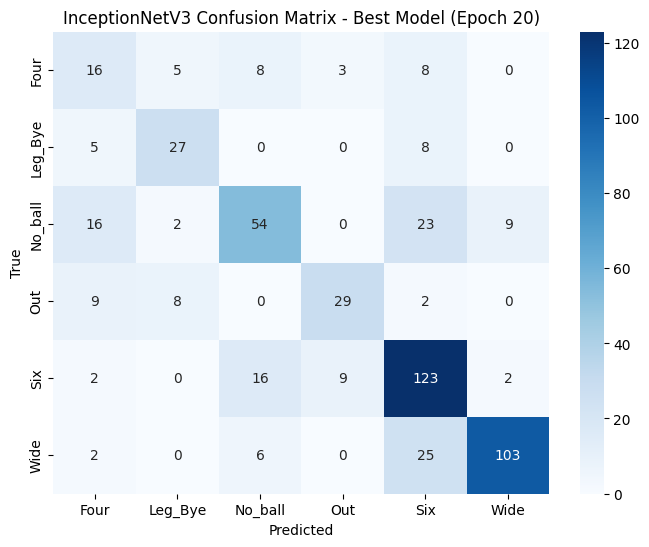

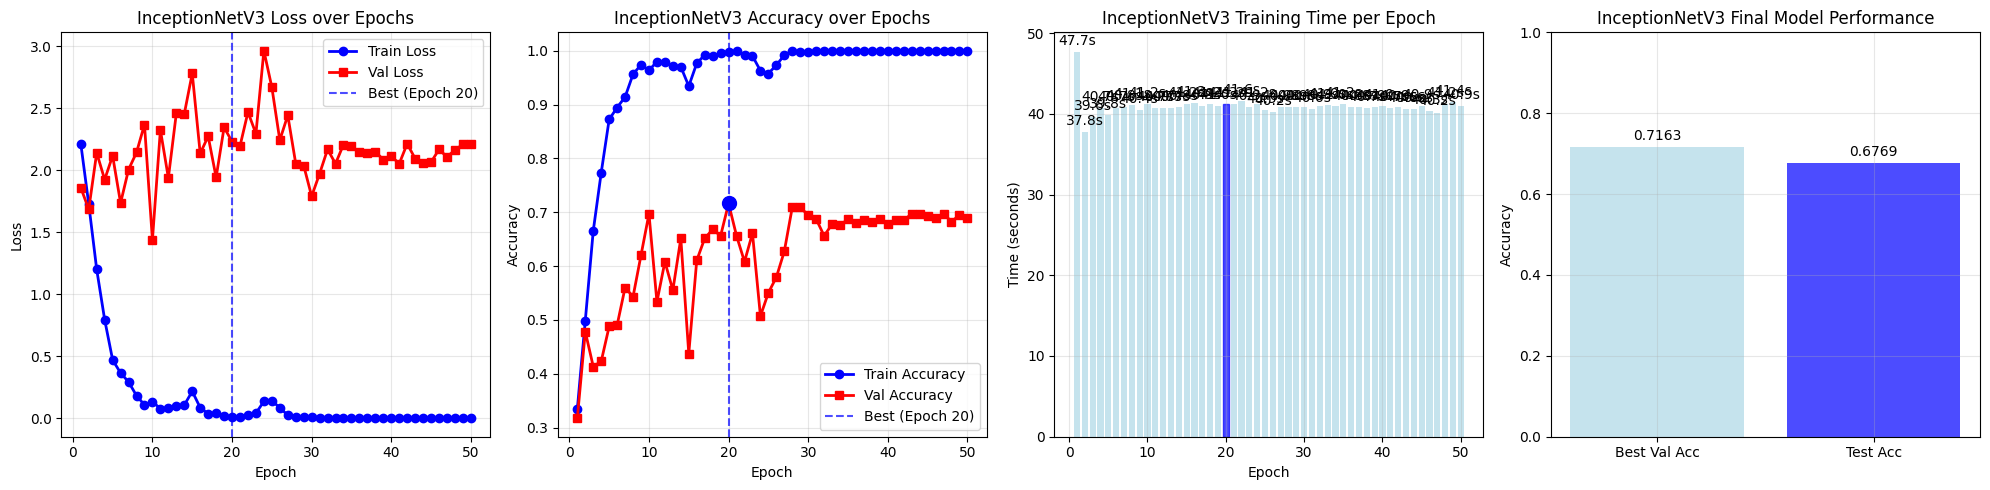


⏰ InceptionNetV3 Final Timing Summary:
│ Total Training: 2045.17s
│ Average per Epoch: 40.90s
│ Testing Time: 9.17s
│ Total Runtime: 2054.34s

💾 InceptionNetV3 Files saved:
│ best_inceptionnetv3_model.pth - Best validation accuracy model
│ inceptionnetv3_training_history.csv - Training metrics for later plotting


In [9]:
# -----------------------------
# 4. Training Loop with Best Model Saving (Val Accuracy) - InceptionNetV3
# -----------------------------
train_losses, val_losses = [], []
train_accs, val_accs = [], []
epoch_times = []
epochs = 50

# Initialize best model tracking
best_val_acc = 0.0
best_model_state = None
best_epoch = 0

print(f"\n🚀 Starting InceptionNetV3 Training for {epochs} epochs...")
print("=" * 80)

total_start_time = time.time()

for epoch in range(epochs):
    epoch_start_time = time.time()
    
    print(f"\n📈 Epoch {epoch+1}/{epochs}")
    print("-" * 50)
    
    # Training Phase
    print("🔄 Training Phase...")
    model.train()
    running_loss, correct, total = 0, 0, 0
    
    train_pbar = tqdm(train_loader, desc=f"Training", 
                     bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    train_phase_start = time.time()
    
    for batch_idx, (imgs, labels) in enumerate(train_pbar):
        # Resize images to 299x299 for InceptionV3
        imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
        imgs, labels = imgs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Handle auxiliary output during training
        if model.aux_logits and model.training:
            outputs, aux_outputs = model(imgs)
            loss1 = criterion(outputs, labels)
            loss2 = criterion(aux_outputs, labels)
            loss = loss1 + 0.4 * loss2  # Weight auxiliary loss by 0.4
        else:
            outputs = model(imgs)
            loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        
        current_acc = correct / total
        train_pbar.set_postfix({
            'Loss': f'{running_loss/(batch_idx+1):.4f}',
            'Acc': f'{current_acc:.4f}'
        })
        
        if device.type == 'cuda' and batch_idx % 10 == 0:
            gpu_memory = torch.cuda.memory_allocated() / 1024**3
            train_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}',  
                'GPU': f'{gpu_memory:.1f}GB'
            })
    
    train_phase_time = time.time() - train_phase_start
    train_loss = running_loss / len(train_loader)
    train_acc = correct / total
    train_losses.append(train_loss)
    train_accs.append(train_acc)
    
    print(f"✅ Training completed in {train_phase_time:.2f}s")
    
    # Validation Phase
    print("🔍 Validation Phase...")
    model.eval()
    running_loss, correct, total = 0, 0, 0
    
    val_phase_start = time.time()
    val_pbar = tqdm(val_loader, desc=f"Validation", 
                   bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')
    
    with torch.no_grad():
        for batch_idx, (imgs, labels) in enumerate(val_pbar):
            # Resize images to 299x299 for InceptionV3
            imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
            imgs, labels = imgs.to(device), labels.to(device)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)
            
            current_acc = correct / total
            val_pbar.set_postfix({
                'Loss': f'{running_loss/(batch_idx+1):.4f}',
                'Acc': f'{current_acc:.4f}'
            })
    
    val_phase_time = time.time() - val_phase_start
    val_loss = running_loss / len(val_loader)
    val_acc = correct / total
    val_losses.append(val_loss)
    val_accs.append(val_acc)
    
    print(f"✅ Validation completed in {val_phase_time:.2f}s")
    
    # Check if this is the best model so far based on val_acc
    is_best = val_acc > best_val_acc
    if is_best:
        best_val_acc = val_acc
        best_epoch = epoch + 1
        best_model_state = model.state_dict().copy()
        print(f"🌟 New best InceptionNetV3 model found! Validation Accuracy: {val_acc:.4f}")
    
    # Epoch Summary
    epoch_time = time.time() - epoch_start_time
    epoch_times.append(epoch_time)
    
    print(f"\n📊 Epoch {epoch+1} Summary:")
    print(f"│ Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"│ Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.4f}")
    print(f"│ Train Time: {train_phase_time:.2f}s | Val Time: {val_phase_time:.2f}s")
    print(f"│ Total Epoch Time: {epoch_time:.2f}s")
    print(f"│ Best Val Acc: {best_val_acc:.4f} (Epoch {best_epoch})")
    
    if device.type == 'cuda':
        print(f"│ GPU Memory: {torch.cuda.memory_allocated()/1024**3:.1f}GB / {torch.cuda.memory_reserved()/1024**3:.1f}GB")
    
    print("=" * 80)

total_training_time = time.time() - total_start_time

# Save the best model
if best_model_state is not None:
    torch.save(best_model_state, 'best_inceptionnetv3_model.pth')
    print(f"\n💾 Best InceptionNetV3 model saved as 'best_inceptionnetv3_model.pth'")
    print(f"📊 Best model stats:")
    print(f"│ Best Epoch: {best_epoch}")
    print(f"│ Best Val Acc: {best_val_acc:.4f}")

# Save training history data to CSV
history_data = {
    'epoch': list(range(1, epochs+1)),
    'train_loss': train_losses,
    'val_loss': val_losses,
    'train_acc': train_accs,
    'val_acc': val_accs,
    'epoch_time': epoch_times
}
history_df = pd.DataFrame(history_data)
history_df.to_csv('inceptionnetv3_training_history.csv', index=False)
print("\n💾 InceptionNetV3 training history saved to 'inceptionnetv3_training_history.csv'")

# Training Summary
print(f"\n🎉 InceptionNetV3 Training Complete!")
print(f"Total Training Time: {total_training_time:.2f}s ({total_training_time/60:.1f} minutes)")
print(f"Average Epoch Time: {np.mean(epoch_times):.2f}s")
print("\n⏱️  Epoch Timing Breakdown:")
for i, t in enumerate(epoch_times):
    print(f"│ Epoch {i+1}: {t:.2f}s")

# -----------------------------
# 5. Load Best Model and Test
# -----------------------------
print(f"\n🧪 Loading Best InceptionNetV3 Model for Testing...")

# Load the best model state
if best_model_state is not None:
    model.load_state_dict(best_model_state)
    print(f"✅ Best InceptionNetV3 model from epoch {best_epoch} loaded successfully!")
else:
    print("⚠️  No best model found, using current model state")

test_start_time = time.time()
y_true, y_pred = [], []
model.eval()

test_pbar = tqdm(test_loader, desc="Testing InceptionNetV3", 
                bar_format='{l_bar}{bar:30}{r_bar}{bar:-30b}')

with torch.no_grad():
    for imgs, labels in test_pbar:
        # Resize images to 299x299 for InceptionV3
        imgs = F.interpolate(imgs, size=(299, 299), mode='bilinear', align_corners=False)
        imgs, labels = imgs.to(device), labels.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

test_time = time.time() - test_start_time
test_accuracy = accuracy_score(y_true, y_pred)

print(f"✅ InceptionNetV3 Testing completed in {test_time:.2f}s")
print("\n📋 InceptionNetV3 Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))
print(f"🎯 InceptionNetV3 Test Accuracy: {test_accuracy:.4f}")

# Model Performance Summary
print(f"\n📊 InceptionNetV3 Model Performance Summary:")
print(f"│ Best Validation Acc:  {best_val_acc:.4f} (Epoch {best_epoch})")
print(f"│ Final Test Accuracy:  {test_accuracy:.4f}")
print(f"│ Val-Test Gap:         {abs(best_val_acc - test_accuracy):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"InceptionNetV3 Confusion Matrix - Best Model (Epoch {best_epoch})")
plt.show()

# -----------------------------
# 6. Enhanced Visualizations
# -----------------------------
plt.figure(figsize=(20, 5))

# Loss Plot
plt.subplot(1, 4, 1)
plt.plot(range(1, epochs+1), train_losses, 'b-', label="Train Loss", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_losses, 'r-', label="Val Loss", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.legend()
plt.title("InceptionNetV3 Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True, alpha=0.3)

# Accuracy Plot
plt.subplot(1, 4, 2)
plt.plot(range(1, epochs+1), train_accs, 'b-', label="Train Accuracy", marker='o', linewidth=2)
plt.plot(range(1, epochs+1), val_accs, 'r-', label="Val Accuracy", marker='s', linewidth=2)
plt.axvline(x=best_epoch, color='blue', linestyle='--', alpha=0.7, label=f'Best (Epoch {best_epoch})')
plt.scatter([best_epoch], [best_val_acc], color='blue', s=100, zorder=5)
plt.legend()
plt.title("InceptionNetV3 Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid(True, alpha=0.3)

# Timing Plot
plt.subplot(1, 4, 3)
bars = plt.bar(range(1, epochs+1), epoch_times, color='lightblue', alpha=0.7)
bars[best_epoch-1].set_color('blue')
plt.title("InceptionNetV3 Training Time per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Time (seconds)")
plt.grid(True, alpha=0.3)
for i, t in enumerate(epoch_times):
    plt.text(i+1, t+0.5, f'{t:.1f}s', ha='center', va='bottom')

# Performance Comparison
plt.subplot(1, 4, 4)
metrics = ['Best Val Acc', 'Test Acc']
values = [best_val_acc, test_accuracy]
colors = ['lightblue', 'blue']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.title("InceptionNetV3 Final Model Performance")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.01, 
             f'{val:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print(f"\n⏰ InceptionNetV3 Final Timing Summary:")
print(f"│ Total Training: {total_training_time:.2f}s")
print(f"│ Average per Epoch: {np.mean(epoch_times):.2f}s")
print(f"│ Testing Time: {test_time:.2f}s")
print(f"│ Total Runtime: {total_training_time + test_time:.2f}s")

print(f"\n💾 InceptionNetV3 Files saved:")
print(f"│ best_inceptionnetv3_model.pth - Best validation accuracy model")
print(f"│ inceptionnetv3_training_history.csv - Training metrics for later plotting")